In [1]:
import torch
import torchio as tio
from torch.utils.data import DataLoader

import os

In [2]:
# Get the DiFuMo projector.
from ai4sipmbda.utils import fetching, difumo_utils

# Number of images to fetch
max_images = 10

# Fetching...
neurovault = fetching.fetch_nv(max_images = max_images)


Load pre-fetched data from Neurovault...
Number of (down)loaded fMRI files: 10


In [3]:
neurovault.images[0]

'../../Data/neurovault/neurovault/collection_4337/image_69118.nii.gz'

In [4]:
IMAGE_PATH = neurovault.images[0]

In [5]:
# Each instance of tio.Subject is passed arbitrary keyword arguments.
# Typically, these arguments will be instances of tio.Image
image_tio_orig = tio.ScalarImage(IMAGE_PATH)

In [62]:
augs_with_converted_augs = {
    "RandomMotion": ["degrees", "translation"], 
    "RandomGhosting": ["num_ghosts", "intensity"], 
    "RandomSpike": ["num_spikes", "intensity"], 
"RandomBiasField": ["coefficients"], 
"RandomBlur": ["std"], 
"RandomNoise": ["mean", "std"],
"RandomGamma": ["log_gamma"]} 

def process_kwargs(augmentation_name, kwargs):
    if augmentation_name in augs_with_converted_augs.keys(): 
        for key in kwargs.keys():
            if key in augs_with_converted_augs[augmentation_name]:
                kwargs[key] = (kwargs[key], kwargs[key])
    return kwargs

In [7]:
import nibabel
from nilearn.plotting import plot_glass_brain
import matplotlib.pyplot as plt 

def show_transformation(image_path: str, 
                        name : bool, 
                        show_difference = False, **kwargs):
    
    image_tio = tio.ScalarImage(image_path)

    plot_glass_brain(nibabel.load(image_path), title = "Original" )
    kwargs = process_kwargs(name, kwargs)

    transform = getattr(tio, name)(p =1.0, **kwargs)
    image_transformed = transform(image_tio)
    
    if show_difference: 
            image_nib = nibabel.Nifti1Image((image_transformed.data - image_tio.data).squeeze().numpy(), affine = image_tio.affine)

    else: 
        image_nib = nibabel.Nifti1Image(image_transformed.data.squeeze().numpy(), affine = image_tio.affine)
    
    plot_glass_brain(image_nib, title = f"Transformed with {name}" )


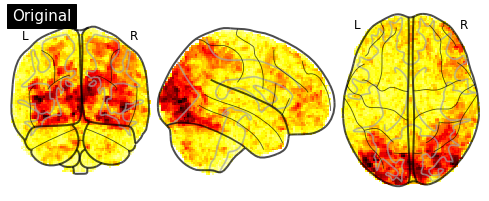

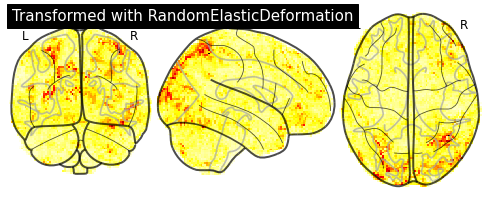

In [8]:
show_transformation(IMAGE_PATH, 
                     "RandomElasticDeformation", 
                     show_difference=True, 
                     num_control_points=15, 
                     max_displacement=2)

In [9]:
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [17]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomElasticDeformation"), 
                     show_difference=True, 
                     num_control_points=widgets.IntSlider(min = 5, max = 20, step = 1), 
                     max_displacement=widgets.IntSlider(min = 1, max =  4, step = 1))

In [18]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), IntSlider(value=5, description='num…

In [34]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomMotion"), 
                 show_difference=True, 
                 degrees=widgets.FloatSlider(min=0, max=2, step=0.02, value=0.01), 
                 translation=widgets.FloatSlider(min=0, max=2, step=0.02, value=0.01),
                 num_transforms=widgets.IntSlider(min=1, max=3, step=1, value=2), 
           )

In [35]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), FloatSlider(value=0.01, description…

In [38]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomGhosting"), 
                 show_difference=True, 
                 num_ghosts = widgets.IntSlider(min=1, max=5, step=1, value=1), 
                 axes = widgets.IntSlider(min=0, max=2, step=1, value=0), 
                 intensity=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.01), 
                 restore=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.01),
           )

In [39]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), IntSlider(value=1, description='num…

In [45]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomSpike"), 
                 show_difference=True, 
                 num_spikes=widgets.IntSlider(min=1, max=5, step=1, value=2), 
                 intensity=widgets.FloatSlider(min=0, max=10, step=0.02, value=0.01), 
                )

In [46]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), IntSlider(value=2, description='num…

In [50]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomBiasField"), 
                 show_difference=True, 
                coefficients=widgets.FloatSlider(min=0, max=2, step=0.002, value=0.01), 
                 order=widgets.IntSlider(min=1, max=5, step=1, value=2), 
                )

In [51]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), FloatSlider(value=0.01, description…

In [57]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomBlur"), 
                 show_difference=True, 
                 std=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.01), 
                )

In [58]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), FloatSlider(value=0.01, description…

In [60]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomNoise"), 
                 show_difference=True, 
                 mean=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.01), 
                 std=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.01), 
                )

In [61]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), FloatSlider(value=0.01, description…

In [63]:
w = interactive(show_transformation, 
                 image_path = fixed(IMAGE_PATH), 
                 name = fixed("RandomGamma"), 
                 show_difference=True, 
                 log_gamma=widgets.FloatSlider(min=-1, max=1, step=0.01, value=0.01), 
                )

In [64]:
display(w)

interactive(children=(Checkbox(value=True, description='show_difference'), FloatSlider(value=0.01, description…